In [3]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

**Part 1: Warm-up**

In [4]:
df = pd.read_csv("202107-citibike-tripdata.csv")

In [5]:
df.describe()

,start_station_id,start_lat,start_lng,end_lat,end_lng
count,3.084505e+06,3.084537e+06,3.084537e+06,3.077618e+06,3.077618e+06
mean,6.009147e+03,4.073992e+01,-7.397558e+01,4.073971e+01,-7.397567e+01
std,1.084121e+03,3.892845e-02,2.573969e-02,3.887384e-02,2.576022e-02
min,2.733030e+03,4.063338e+01,-7.402747e+01,4.063338e+01,-7.408364e+01
25%,5.303060e+03,4.071534e+01,-7.399405e+01,4.071514e+01,-7.399416e+01
50%,6.004060e+03,4.073782e+01,-7.398154e+01,4.073726e+01,-7.398163e+01
75%,6.779040e+03,4.076229e+01,-7.395866e+01,4.076229e+01,-7.395866e+01
max,8.841030e+03,4.088226e+01,-7.388145e+01,4.088226e+01,-7.388000e+01


In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual


In [7]:
durations = []
for index, row in df.iterrows():
    start = datetime.strptime((row["started_at"]), "%Y-%m-%d %H:%M:%S")
    end = datetime.strptime((row["ended_at"]), "%Y-%m-%d %H:%M:%S")
    durations.append((end-start).total_seconds() / 60)
    
    if len(durations) % 200000 == 0:
        print(len(durations))

200000
400000
600000
800000
1000000
1200000
1400000
1600000
1800000
2000000
2200000
2400000
2600000
2800000
3000000


In [8]:
df['duration'] = durations
durations_df=df[df['duration']<=200]
durations_df = durations_df[durations_df['duration']>=0]

Text(0.5, 1.0, 'Trip Duration vs. Frequency')

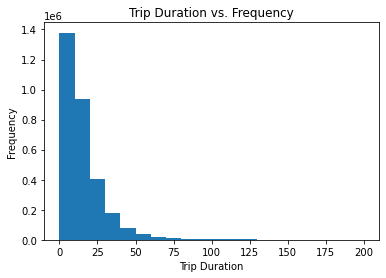

In [115]:
plt.hist(durations_df['duration'], bins=20)
plt.xlabel("Trip Duration")
plt.ylabel("Frequency")
plt.title("Trip Duration vs. Frequency")

In [10]:
mean_duration=durations_df['duration'].mean()
print("Expected ride duration is ", mean_duration, "minutes")

Expected ride duration is  15.731621648045461 minutes


In [11]:
var_duration= durations_df['duration'].var()
print("variance of ride duration is ", var_duration, "minutes")

variance of ride duration is  259.1339891398311 minutes


In [12]:
prob= len(durations_df[durations_df['duration']>20])/len(durations_df['duration'])
print("The probability that the duration of the trip is greater than 20 minutes is ", prob)

The probability that the duration of the trip is greater than 20 minutes is  0.24752095985962919


In [13]:
member= durations_df[durations_df['member_casual']=='member']
prob_member= len(member[member['duration']>20])/len(member)
print("The probability that the duration of the trip is greater than 20 minutes given that the rider is a member is ", prob_member)

The probability that the duration of the trip is greater than 20 minutes given that the rider is a member is  0.19318310171745173


(4) Use Bayes rule to compute:  

$P(member | ride >25 min) = \tfrac{P(ride > 25 min | member)* P(member)}{P(ride > 25 min)}$

In [14]:
prob_25_member= len(member[member['duration']>25])/len(member)
prob_member= len(member)/len(durations_df)
prob_25= len(durations_df[durations_df['duration']>25])/len(durations_df['duration'])
prob_member_given_ride_greater25= (prob_25_member*prob_member)/prob_25
prob_member_given_ride_greater25

0.4863717519405981

**Part 2: Marcov Chain**

In [15]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,12.550000
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,5.533333
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,13.550000
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,27.833333
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,1.400000


In [16]:
start_station_counts = df.groupby(by=["start_station_name"]).size().sort_values(ascending=False)
end_station_counts = df.groupby(by=["end_station_name"]).size().sort_values(ascending=False)

In [17]:
start_station_counts.head()

start_station_name
7 Ave & Central Park South    14254
E 17 St & Broadway            13600
W 21 St & 6 Ave               13488
West St & Chambers St         13311
Broadway & W 25 St            12753
dtype: int64

In [18]:
end_station_counts.head()

end_station_name
7 Ave & Central Park South    14300
E 17 St & Broadway            13959
W 21 St & 6 Ave               13559
West St & Chambers St         13353
Broadway & W 25 St            12691
dtype: int64

In [19]:
#For part 2 of the project, our group is choosing the top three most frequented stations to conduct our sationary 
#distribution analysis. As seen above, these stations are "7 Ave & Central Park South, E 17 St & Broadway, and W 21 St & 6 Ave"

In [20]:
stations_df=durations_df[(durations_df['start_station_name']=="7 Ave & Central Park South") | 
                        (durations_df['end_station_name']=="7 Ave & Central Park South") |
                        (durations_df['start_station_name']=="E 17 St & Broadway") | 
                        (durations_df['end_station_name']=="E 17 St & Broadway") | 
                        (durations_df['start_station_name']=="W 21 St & 6 Ave") | 
                        (durations_df['end_station_name']=="W 21 St & 6 Ave")]

In [21]:
stations_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
349,F056D638CE31AAFB,classic_bike,2021-07-22 15:31:11,2021-07-22 16:01:36,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667
359,BA551412766AAD13,classic_bike,2021-07-30 09:36:16,2021-07-30 09:46:12,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333
361,8FDD1ACE3FA49DE0,classic_bike,2021-07-30 13:12:26,2021-07-30 13:20:54,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667
365,5C0AC13637A3D674,classic_bike,2021-07-26 22:22:50,2021-07-26 22:36:21,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667
379,9506728EC71B1D33,classic_bike,2021-07-08 13:59:03,2021-07-08 14:15:53,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333


In [22]:
starts = []
ends = []
for index, row in stations_df.iterrows():
    start_datetime_object = datetime.strptime((row["started_at"]), "%Y-%m-%d %H:%M:%S")
    end_datetime_object = datetime.strptime((row["ended_at"]), "%Y-%m-%d %H:%M:%S")
    starts.append(start_datetime_object)
    ends.append(end_datetime_object)
    
    if len(starts) % 10000 == 0:
        print(len(starts))

10000
20000
30000
40000
50000
60000
70000


In [23]:
start_datetime = []
for date in starts:
    if date.weekday() != 5 and date.weekday() != 6:
        start_datetime.append(date)    

In [24]:
end_datetime = []
for date in ends:
    if date.weekday() != 5 and date.weekday() != 6:
        end_datetime.append(date)   

In [25]:
print(len(start_datetime))

55689


In [26]:
print(len(end_datetime))

55688


In [27]:
stations_weekdays = pd.DataFrame(columns = stations_df.columns)

for index, row in stations_df.iterrows():
    if (datetime.strptime((row["started_at"]), "%Y-%m-%d %H:%M:%S").weekday() != 5
    and datetime.strptime((row["started_at"]), "%Y-%m-%d %H:%M:%S").weekday() != 6
    and datetime.strptime((row["ended_at"]), "%Y-%m-%d %H:%M:%S").weekday() != 5
    and datetime.strptime((row["ended_at"]), "%Y-%m-%d %H:%M:%S").weekday() != 6):
        stations_weekdays.loc[index] = stations_df.loc[index]
    
    if len(stations_weekdays) % 10000 == 0:
        print(len(stations_weekdays))

10000
10000
10000
10000
20000
20000
30000
40000
50000


In [28]:
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'index']

In [29]:
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'level_0']

In [30]:
stations_weekdays.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
349,F056D638CE31AAFB,classic_bike,2021-07-22 15:31:11,2021-07-22 16:01:36,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667
359,BA551412766AAD13,classic_bike,2021-07-30 09:36:16,2021-07-30 09:46:12,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333
361,8FDD1ACE3FA49DE0,classic_bike,2021-07-30 13:12:26,2021-07-30 13:20:54,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667
365,5C0AC13637A3D674,classic_bike,2021-07-26 22:22:50,2021-07-26 22:36:21,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667
379,9506728EC71B1D33,classic_bike,2021-07-08 13:59:03,2021-07-08 14:15:53,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333


In [31]:
#split the day into two blocks of time representing the morning and the evening blocks, conditioned on the ride starts

In [32]:
#Step 1 -- turn "started_at" and "ended_at" columns to datetime objects
starts = []
ends = []
for index, row in stations_weekdays.iterrows():
    start_datetime_object = datetime.strptime((row["started_at"]), "%Y-%m-%d %H:%M:%S")
    end_datetime_object = datetime.strptime((row["ended_at"]), "%Y-%m-%d %H:%M:%S")
    starts.append(start_datetime_object)
    ends.append(end_datetime_object)
    
    if len(starts) % 10000 == 0:
        print(len(starts))

10000
20000
30000
40000
50000


In [33]:
stations_weekdays["start"] = starts
stations_weekdays["end"] = ends

In [34]:
stations_weekdays.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end
349,F056D638CE31AAFB,classic_bike,2021-07-22 15:31:11,2021-07-22 16:01:36,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667,2021-07-22 15:31:11,2021-07-22 16:01:36
359,BA551412766AAD13,classic_bike,2021-07-30 09:36:16,2021-07-30 09:46:12,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333,2021-07-30 09:36:16,2021-07-30 09:46:12
361,8FDD1ACE3FA49DE0,classic_bike,2021-07-30 13:12:26,2021-07-30 13:20:54,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667,2021-07-30 13:12:26,2021-07-30 13:20:54
365,5C0AC13637A3D674,classic_bike,2021-07-26 22:22:50,2021-07-26 22:36:21,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667,2021-07-26 22:22:50,2021-07-26 22:36:21
379,9506728EC71B1D33,classic_bike,2021-07-08 13:59:03,2021-07-08 14:15:53,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333,2021-07-08 13:59:03,2021-07-08 14:15:53


In [35]:
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'started_at']
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'ended_at']
stations_weekdays["hour_start"] = [time.hour for time in stations_weekdays["start"]]

In [36]:
stations_weekdays.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end,hour_start
349,F056D638CE31AAFB,classic_bike,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667,2021-07-22 15:31:11,2021-07-22 16:01:36,15
359,BA551412766AAD13,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333,2021-07-30 09:36:16,2021-07-30 09:46:12,9
361,8FDD1ACE3FA49DE0,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667,2021-07-30 13:12:26,2021-07-30 13:20:54,13
365,5C0AC13637A3D674,classic_bike,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667,2021-07-26 22:22:50,2021-07-26 22:36:21,22
379,9506728EC71B1D33,classic_bike,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333,2021-07-08 13:59:03,2021-07-08 14:15:53,13


(array([ 350.,  176.,  124.,   71.,   59.,  396., 1170., 2047., 3703.,
        3410., 2799., 3060., 3391., 3537., 3651., 3786., 4145., 5034.,
        5118., 3866., 2589., 1412., 1015.,  727.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

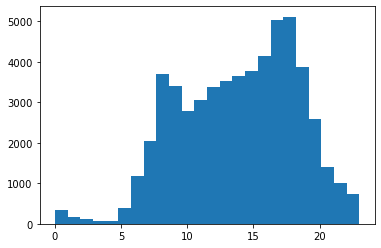

In [37]:
plt.hist(stations_weekdays["hour_start"], bins=24) #two peeks for the morning and evening periods, around hour = 8 and hour = 15
#based on this, the morning block should be from 2am - 2pm -- block 0, otherwise block 1 (evening block)

In [38]:
day_block = []
for index, row in stations_weekdays.iterrows():
    if row["hour_start"] < 2:
        day_block.append(1)
    elif row["hour_start"] < 14:
        day_block.append(0)
    else:
        day_block.append(1)

In [39]:
stations_weekdays["day_block"] = day_block

In [40]:
stations_weekdays.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end,hour_start,day_block
349,F056D638CE31AAFB,classic_bike,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667,2021-07-22 15:31:11,2021-07-22 16:01:36,15,1
359,BA551412766AAD13,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333,2021-07-30 09:36:16,2021-07-30 09:46:12,9,0
361,8FDD1ACE3FA49DE0,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667,2021-07-30 13:12:26,2021-07-30 13:20:54,13,0
365,5C0AC13637A3D674,classic_bike,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667,2021-07-26 22:22:50,2021-07-26 22:36:21,22,1
379,9506728EC71B1D33,classic_bike,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333,2021-07-08 13:59:03,2021-07-08 14:15:53,13,0


In [41]:
#discretize blocks into periods of 5 or 10 minutes
stations_weekdays["time"] = [time.time() for time in stations_weekdays["start"]]

In [42]:
stations_weekdays.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end,hour_start,day_block,time
349,F056D638CE31AAFB,classic_bike,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667,2021-07-22 15:31:11,2021-07-22 16:01:36,15,1,15:31:11
359,BA551412766AAD13,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333,2021-07-30 09:36:16,2021-07-30 09:46:12,9,0,09:36:16
361,8FDD1ACE3FA49DE0,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667,2021-07-30 13:12:26,2021-07-30 13:20:54,13,0,13:12:26
365,5C0AC13637A3D674,classic_bike,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667,2021-07-26 22:22:50,2021-07-26 22:36:21,22,1,22:22:50
379,9506728EC71B1D33,classic_bike,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333,2021-07-08 13:59:03,2021-07-08 14:15:53,13,0,13:59:03


In [43]:
import math

In [44]:
time_block = [math.floor((time.hour * 60 + time.minute) / 5) for time in stations_weekdays["time"]]

In [45]:
max(time_block)

287

In [46]:
stations_weekdays["time_block"] = time_block

In [47]:
stations_weekdays.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end,hour_start,day_block,time,time_block
349,F056D638CE31AAFB,classic_bike,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667,2021-07-22 15:31:11,2021-07-22 16:01:36,15,1,15:31:11,186
359,BA551412766AAD13,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333,2021-07-30 09:36:16,2021-07-30 09:46:12,9,0,09:36:16,115
361,8FDD1ACE3FA49DE0,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667,2021-07-30 13:12:26,2021-07-30 13:20:54,13,0,13:12:26,158
365,5C0AC13637A3D674,classic_bike,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667,2021-07-26 22:22:50,2021-07-26 22:36:21,22,1,22:22:50,268
379,9506728EC71B1D33,classic_bike,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333,2021-07-08 13:59:03,2021-07-08 14:15:53,13,0,13:59:03,167


In [48]:
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'hour']
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'hour_start']
stations_weekdays = stations_weekdays.loc[:, stations_weekdays.columns != 'hour_min']

In [49]:
stations_weekdays.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end,day_block,time,time_block
349,F056D638CE31AAFB,classic_bike,Broadway & 51 St,6545.07,W 21 St & 6 Ave,6140.05,40.754164,-73.908906,40.74174,-73.994156,member,30.416667,2021-07-22 15:31:11,2021-07-22 16:01:36,1,15:31:11,186
359,BA551412766AAD13,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,9.933333,2021-07-30 09:36:16,2021-07-30 09:46:12,0,09:36:16,115
361,8FDD1ACE3FA49DE0,classic_bike,6 Ave & Broome St,5610.09,W 21 St & 6 Ave,6140.05,40.724310,-74.004730,40.74174,-73.994156,casual,8.466667,2021-07-30 13:12:26,2021-07-30 13:20:54,0,13:12:26,158
365,5C0AC13637A3D674,classic_bike,Avenue D & E 10 St,5575.13,W 21 St & 6 Ave,6140.05,40.725066,-73.975158,40.74174,-73.994156,member,13.516667,2021-07-26 22:22:50,2021-07-26 22:36:21,1,22:22:50,268
379,9506728EC71B1D33,classic_bike,E 7 St & Avenue A,5626.07,W 21 St & 6 Ave,6140.05,40.726218,-73.983799,40.74174,-73.994156,casual,16.833333,2021-07-08 13:59:03,2021-07-08 14:15:53,0,13:59:03,167


In [50]:
day_of_month = []
for index, row in stations_weekdays.iterrows():
    day_of_month.append(row["start"].day)
stations_weekdays["day_of_month"] = day_of_month

In [51]:
#station_capacities -- collect from google?
morning_data = stations_weekdays[stations_weekdays["day_block"] == 0]
evening_data = stations_weekdays[stations_weekdays["day_block"] == 1]

In [52]:
morning_data_station1=morning_data[(morning_data['start_station_name']=="7 Ave & Central Park South") | 
                        (durations_df['end_station_name']=="7 Ave & Central Park South")]
evening_data_station1=evening_data[(evening_data['start_station_name']=="7 Ave & Central Park South") | 
                        (durations_df['end_station_name']=="7 Ave & Central Park South")]
morning_data_station2=morning_data[(morning_data['start_station_name']=="E 17 St & Broadway") | 
                        (durations_df['end_station_name']=="E 17 St & Broadway")]
evening_data_station2=evening_data[(evening_data['start_station_name']=="E 17 St & Broadway") | 
                        (durations_df['end_station_name']=="E 17 St & Broadway")]
morning_data_station3=morning_data[(morning_data['start_station_name']=="W 21 St & 6 Ave") | 
                        (durations_df['end_station_name']=="W 21 St & 6 Ave")]
evening_data_station3=evening_data[(evening_data['start_station_name']=="W 21 St & 6 Ave") | 
                        (durations_df['end_station_name']=="W 21 St & 6 Ave")]

<ipython-input-52-c9e202f8b004>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morning_data_station1=morning_data[(morning_data['start_station_name']=="7 Ave & Central Park South") |
<ipython-input-52-c9e202f8b004>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  evening_data_station1=evening_data[(evening_data['start_station_name']=="7 Ave & Central Park South") |
<ipython-input-52-c9e202f8b004>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morning_data_station2=morning_data[(morning_data['start_station_name']=="E 17 St & Broadway") |
<ipython-input-52-c9e202f8b004>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  evening_data_station2=evening_data[(evening_data['start_station_name']=="E 17 St & Broadway") |
<ipython-input-52-c9e202f8b004>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  morning_data_station3=morning_data[

In [53]:
morning_data_station1.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start,end,day_block,time,time_block,day_of_month
69789,10E3D820F772421C,classic_bike,W 84 St & Broadway,7409.08,7 Ave & Central Park South,6912.01,40.786795,-73.977112,40.766741,-73.979069,member,11.233333,2021-07-22 09:09:45,2021-07-22 09:20:59,0,09:09:45,109,22
69797,893FF79A9A8F21AA,classic_bike,Lenox Ave & W 111 St,7602.05,7 Ave & Central Park South,6912.01,40.798786,-73.952300,40.766741,-73.979069,member,16.066667,2021-07-14 11:10:36,2021-07-14 11:26:40,0,11:10:36,134,14
69802,9DE7C38D06BD01A2,classic_bike,Lenox Ave & W 111 St,7602.05,7 Ave & Central Park South,6912.01,40.798786,-73.952300,40.766741,-73.979069,member,39.050000,2021-07-30 13:35:22,2021-07-30 14:14:25,0,13:35:22,163,30
69804,F4D4523D1D2FDF6F,classic_bike,Lenox Ave & W 111 St,7602.05,7 Ave & Central Park South,6912.01,40.798786,-73.952300,40.766741,-73.979069,casual,36.433333,2021-07-07 12:14:46,2021-07-07 12:51:12,0,12:14:46,146,7
69815,C5FDD9F1456E99EE,classic_bike,W 84 St & Broadway,7409.08,7 Ave & Central Park South,6912.01,40.786795,-73.977112,40.766741,-73.979069,member,11.200000,2021-07-06 13:14:22,2021-07-06 13:25:34,0,13:14:22,158,6


In [54]:
bike_change = []
for index, row in morning_data_station1.iterrows():
    if row["start_station_name"] == "7 Ave & Central Park South" and row["end_station_name"] != "7 Ave & Central Park South":
        bike_change.append(-1)
    elif row["end_station_name"] == "7 Ave & Central Park South" and row["start_station_name"] != "7 Ave & Central Park South":
        bike_change.append(1)
    else:
        bike_change.append(0)
morning_data_station1["bike_change"] = bike_change

<ipython-input-54-325ce7b321bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_data_station1["bike_change"] = bike_change


In [55]:
bike_change = []
for index, row in evening_data_station1.iterrows():
    if row["start_station_name"] == "7 Ave & Central Park South" and row["end_station_name"] != "7 Ave & Central Park South":
        bike_change.append(-1)
    elif row["end_station_name"] == "7 Ave & Central Park South" and row["start_station_name"] != "7 Ave & Central Park South":
        bike_change.append(1)
    else:
        bike_change.append(0)
evening_data_station1["bike_change"] = bike_change

<ipython-input-55-972034df2e4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_data_station1["bike_change"] = bike_change


In [56]:
bike_change = []
for index, row in morning_data_station2.iterrows():
    if row["start_station_name"] == "E 17 St & Broadway" and row["end_station_name"] != "E 17 St & Broadway":
        bike_change.append(-1)
    elif row["end_station_name"] == "E 17 St & Broadway" and row["start_station_name"] != "E 17 St & Broadway":
        bike_change.append(1)
    else:
        bike_change.append(0)
morning_data_station2["bike_change"] = bike_change

<ipython-input-56-aaee36c08798>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_data_station2["bike_change"] = bike_change


In [57]:
bike_change = []
for index, row in evening_data_station2.iterrows():
    if row["start_station_name"] == "E 17 St & Broadway" and row["end_station_name"] != "E 17 St & Broadway":
        bike_change.append(-1)
    elif row["end_station_name"] == "E 17 St & Broadway" and row["start_station_name"] != "E 17 St & Broadway":
        bike_change.append(1)
    else:
        bike_change.append(0)
evening_data_station2["bike_change"] = bike_change

<ipython-input-57-8630adf49233>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_data_station2["bike_change"] = bike_change


In [58]:
bike_change = []
for index, row in morning_data_station3.iterrows():
    if row["start_station_name"] == "W 21 St & 6 Ave" and row["end_station_name"] != "W 21 St & 6 Ave":
        bike_change.append(-1)
    elif row["end_station_name"] == "W 21 St & 6 Ave" and row["start_station_name"] != "W 21 St & 6 Ave":
        bike_change.append(1)
    else:
        bike_change.append(0)
morning_data_station3["bike_change"] = bike_change

<ipython-input-58-d0afde504716>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_data_station3["bike_change"] = bike_change


In [59]:
bike_change = []
for index, row in evening_data_station3.iterrows():
    if row["start_station_name"] == "W 21 St & 6 Ave" and row["end_station_name"] != "W 21 St & 6 Ave":
        bike_change.append(-1)
    elif row["end_station_name"] == "W 21 St & 6 Ave" and row["start_station_name"] != "W 21 St & 6 Ave":
        bike_change.append(1)
    else:
        bike_change.append(0)
evening_data_station3["bike_change"] = bike_change

<ipython-input-59-a239696aa2f5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_data_station3["bike_change"] = bike_change


In [60]:
morning_station1_blocked = morning_data_station1.groupby(["time_block","day_of_month"])["bike_change"].sum()
evening_station1_blocked = evening_data_station1.groupby(["time_block","day_of_month"])["bike_change"].sum()
morning_station2_blocked = morning_data_station2.groupby(["time_block","day_of_month"])["bike_change"].sum()
evening_station2_blocked = evening_data_station2.groupby(["time_block","day_of_month"])["bike_change"].sum()
morning_station3_blocked = morning_data_station3.groupby(["time_block","day_of_month"])["bike_change"].sum()
evening_station3_blocked = evening_data_station3.groupby(["time_block","day_of_month"])["bike_change"].sum()

In [61]:
from collections import Counter
#morning_station1_blocked.values is an array of all the bike change rates over all 5 minute blocks for station 1
#during the morning time block
counts = Counter(morning_station1_blocked.values)
rates_m1=pd.DataFrame(columns=["bike_change","probabilities"])
bikes = []
probabilities = []

total=0
for i in counts:
    total += counts[i]
for i in counts:
    bikes.append(i)
    probabilities.append(counts[i] / total)

rates_m1["bike_change"] = bikes
rates_m1["probabilities"] = probabilities
bike_change_m1= rates_m1["bike_change"]
rates_m1 = rates_m1.set_index("bike_change")

In [62]:
#create transition matrix for station1, morning block
P_m1 = np.ndarray((38,38))

for i in range(38):
    for j in range(38):
        if j == i:
            P_m1[i][j] = float(rates_m1.loc[0])
        elif j>i and j-i in bike_change_m1.values:
            P_m1[i][j] = float(rates_m1.loc[j-i])
        elif i>j and j-i in bike_change_m1.values:
            P_m1[i][j] = float(rates_m1.loc[j-i])
        else:
            P_m1[i][j] = 0

In [63]:
counts = Counter(evening_station1_blocked.values)
rates_e1=pd.DataFrame(columns=["bike_change","probabilities"])
bikes = []
probabilities = []

total=0
for i in counts:
    total += counts[i]
for i in counts:
    bikes.append(i)
    probabilities.append(counts[i] / total)

rates_e1["bike_change"] = bikes
rates_e1["probabilities"] = probabilities
bike_change_e1 = rates_e1["bike_change"]
rates_e1 = rates_e1.set_index("bike_change")

In [64]:
P_e1 = np.ndarray((38,38))

for i in range(38):
    for j in range(38):
        if j == i:
            P_e1[i][j] = float(rates_e1.loc[0])
        elif j>i and j-i in bike_change_e1.values:
            P_e1[i][j] = float(rates_e1.loc[j-i])
        elif i>j and j-i in bike_change_e1.values:
            P_e1[i][j] = float(rates_e1.loc[j-i])
        else:
            P_e1[i][j] = 0

In [65]:
counts_m2 = Counter(morning_station2_blocked.values)
rates_m2=pd.DataFrame(columns=["bike_change","probabilities"])
bikes = []
probabilities = []

total=0
for i in counts_m2:
    total += counts_m2[i]
for i in counts_m2:
    bikes.append(i)
    probabilities.append(counts_m2[i] / total)

rates_m2["bike_change"] = bikes
rates_m2["probabilities"] = probabilities
bike_change_m2 = rates_m2["bike_change"]
rates_m2 = rates_m2.set_index("bike_change")

In [66]:
P_m2 = np.ndarray((57,57))

for i in range(57):
    for j in range(57):
        if j == i:
            P_m2[i][j] = float(rates_m2.loc[0])
        elif j>i and j-i in bike_change_m2.values:
            P_m2[i][j] = float(rates_m2.loc[j-i])
        elif i>j and j-i in bike_change_m2.values:
            P_m2[i][j] = float(rates_m2.loc[j-i])
        else:
            P_m2[i][j] = 0

In [67]:
counts_e2 = Counter(evening_station2_blocked.values)
rates_e2=pd.DataFrame(columns=["bike_change","probabilities"])
bikes = []
probabilities = []

total=0
for i in counts_e2:
    total += counts_e2[i]
for i in counts_e2:
    bikes.append(i)
    probabilities.append(counts_e2[i] / total)

rates_e2["bike_change"] = bikes
rates_e2["probabilities"] = probabilities
bike_change_e2 = rates_e2["bike_change"]
rates_e2 = rates_e2.set_index("bike_change")

In [68]:
P_e2 = np.ndarray((57,57))


for i in range(57):
    for j in range(57):
        if j == i:
            P_e2[i][j] = float(rates_e2.loc[0])
        elif j>i and j-i in bike_change_e2.values:
            P_e2[i][j] = float(rates_e2.loc[j-i])
        elif i>j and j-i in bike_change_e2.values:
            P_e2[i][j] = float(rates_e2.loc[j-i])
        else:
            P_e2[i][j] = 0

In [69]:
counts_m3 = Counter(morning_station3_blocked.values)
rates_m3=pd.DataFrame(columns=["bike_change","probabilities"])
bikes = []
probabilities = []

total=0
for i in counts_m3:
    total += counts_m3[i]
for i in counts_m3:
    bikes.append(i)
    probabilities.append(counts_m3[i] / total)

rates_m3["bike_change"] = bikes
rates_m3["probabilities"] = probabilities
bike_change_m3 = rates_m3["bike_change"]
rates_m3 = rates_m3.set_index("bike_change")

In [70]:
P_m3 = np.ndarray((51,51))

for i in range(51):
    for j in range(51):
        if j == i:
            P_m3[i][j] = float(rates_m3.loc[0])
        elif j>i and j-i in bike_change_m3.values:
            P_m3[i][j] = float(rates_m3.loc[j-i])
        elif i>j and j-i in bike_change_m3.values:
            P_m3[i][j] = float(rates_m3.loc[j-i])
        else:
            P_m3[i][j] = 0

In [71]:
counts_e3 = Counter(evening_station3_blocked.values)
rates_e3=pd.DataFrame(columns=["bike_change","probabilities"])
bikes = []
probabilities = []

total=0
for i in counts_e3:
    total += counts_e3[i]
for i in counts_e3:
    bikes.append(i)
    probabilities.append(counts_e3[i] / total)

rates_e3["bike_change"] = bikes
rates_e3["probabilities"] = probabilities
bike_change_e3 = rates_e3["bike_change"]
rates_e3 = rates_e3.set_index("bike_change")

In [72]:
P_e3 = np.ndarray((51,51))

for i in range(51):
    for j in range(51):
        if j == i:
            P_e3[i][j] = float(rates_e3.loc[0])
        elif j>i and j-i in bike_change_e3.values:
            P_e3[i][j] = float(rates_e3.loc[j-i])
        elif i>j and j-i in bike_change_e3.values:
            P_e3[i][j] = float(rates_e3.loc[j-i])
        else:
            P_e3[i][j] = 0

In [191]:
P_m1_visual = pd.DataFrame(P_m1)
P_e1_visual = pd.DataFrame(P_e1)
P_m2_visual = pd.DataFrame(P_m2)
P_e2_visual = pd.DataFrame(P_e2)
P_m3_visual = pd.DataFrame(P_m3)
P_e3_visual = pd.DataFrame(P_e3)

In [194]:
P_m1_visual

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.169100,0.243052,0.119171,0.065002,0.026849,0.009421,0.001884,0.002355,0.000942,0.000471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.182760,0.169100,0.243052,0.119171,0.065002,0.026849,0.009421,0.001884,0.002355,0.000942,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.086199,0.182760,0.169100,0.243052,0.119171,0.065002,0.026849,0.009421,0.001884,0.002355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.050400,0.086199,0.182760,0.169100,0.243052,0.119171,0.065002,0.026849,0.009421,0.001884,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.022610,0.050400,0.086199,0.182760,0.169100,0.243052,0.119171,0.065002,0.026849,0.009421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.013189,0.022610,0.050400,0.086199,0.182760,0.169100,0.243052,0.119171,0.065002,0.026849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.004239,0.013189,0.022610,0.050400,0.086199,0.182760,0.169100,0.243052,0.119171,0.065002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.001413,0.004239,0.013189,0.022610,0.050400,0.086199,0.182760,0.169100,0.243052,0.119171,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.001413,0.004239,0.013189,0.022610,0.050400,0.086199,0.182760,0.169100,0.243052,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000942,0.000000,0.001413,0.004239,0.013189,0.022610,0.050400,0.086199,0.182760,0.169100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [203]:
import numpy as np
from scipy.linalg import eig 

transition_mat_pm1 = np.array(P_m1_visual)

S, U = eig(transition_mat_pm1.T)
stationary_m1 = np.array(U[:, np.where(np.abs(S - 1.) < 1e-1)[0][0]].flat)
stationary_m1 = stationary_m1 / np.sum(stationary_m1)

stationary_m1

array([0.00240562+0.j, 0.00385561+0.j, 0.00541451+0.j, 0.0070902 +0.j,
       0.0088476 +0.j, 0.01067559+0.j, 0.01256488+0.j, 0.01451401+0.j,
       0.01650898+0.j, 0.01853806+0.j, 0.02058761+0.j, 0.02264366+0.j,
       0.02469063+0.j, 0.02671172+0.j, 0.02868903+0.j, 0.0306035 +0.j,
       0.03243504+0.j, 0.03416254+0.j, 0.03576397+0.j, 0.03721652+0.j,
       0.03849664+0.j, 0.03958024+0.j, 0.04044278+0.j, 0.04105944+0.j,
       0.04140529+0.j, 0.04145559+0.j, 0.04118568+0.j, 0.04057171+0.j,
       0.03959002+0.j, 0.03821384+0.j, 0.03643855+0.j, 0.03422792+0.j,
       0.03156397+0.j, 0.02841937+0.j, 0.0248386 +0.j, 0.02078019+0.j,
       0.01636086+0.j, 0.01145004+0.j])

In [206]:
sum(stationary_m1)

(0.9999999999999999+0j)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


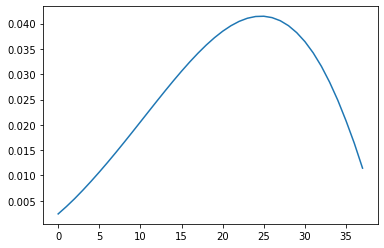

In [199]:
plt.plot(stationary_m1)

In [204]:
transition_mat_pe1 = np.array(P_e1_visual)

S, U = eig(transition_mat_pe1.T)
stationary_e1 = np.array(U[:, np.where(np.abs(S - 1.) < 1e-1)[0][0]].flat)
stationary_e1 = stationary_e1 / np.sum(stationary_e1)

stationary_e1

array([0.00925026-0.j, 0.01320498-0.j, 0.01676849-0.j, 0.020146  -0.j,
       0.02328253-0.j, 0.02612223-0.j, 0.02867278-0.j, 0.03097016-0.j,
       0.03295529-0.j, 0.03466038-0.j, 0.03608493-0.j, 0.03723802-0.j,
       0.03812114-0.j, 0.0387315 -0.j, 0.0390803 -0.j, 0.03917611-0.j,
       0.03902868-0.j, 0.0386487 -0.j, 0.03804805-0.j, 0.03723936-0.j,
       0.03623602-0.j, 0.03505212-0.j, 0.03370226-0.j, 0.03220146-0.j,
       0.03056504-0.j, 0.02880851-0.j, 0.0269475 -0.j, 0.02499694-0.j,
       0.02297409-0.j, 0.02089362-0.j, 0.01877041-0.j, 0.01661875-0.j,
       0.0144521 -0.j, 0.01229006-0.j, 0.01013179-0.j, 0.00803389-0.j,
       0.00596332-0.j, 0.00393223-0.j])

In [205]:
sum(stationary_e1)

(1+0j)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


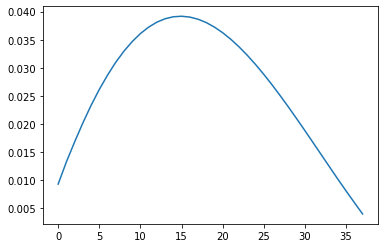

In [207]:
plt.plot(stationary_e1)

In [208]:
transition_mat_pm2 = np.array(P_m2_visual)

S, U = eig(transition_mat_pm2.T)
stationary_m2 = np.array(U[:, np.where(np.abs(S - 1.) < 1e-1)[0][0]].flat)
stationary_m2 = stationary_m2 / np.sum(stationary_m2)

stationary_m2

array([2.08835455e-05-0.j, 3.61485605e-05-0.j, 5.54772948e-05-0.j,
       7.92662571e-05-0.j, 1.08383513e-04-0.j, 1.43674455e-04-0.j,
       1.86169211e-04-0.j, 2.37069346e-04-0.j, 2.97689931e-04-0.j,
       3.69576241e-04-0.j, 4.54449195e-04-0.j, 5.54259750e-04-0.j,
       6.71186328e-04-0.j, 8.07685885e-04-0.j, 9.66500689e-04-0.j,
       1.15068697e-03-0.j, 1.36363943e-03-0.j, 1.60911587e-03-0.j,
       1.89126099e-03-0.j, 2.21462853e-03-0.j, 2.58420106e-03-0.j,
       3.00540596e-03-0.j, 3.48412638e-03-0.j, 4.02670528e-03-0.j,
       4.63994052e-03-0.j, 5.33106845e-03-0.j, 6.10773295e-03-0.j,
       6.97793638e-03-0.j, 7.94996818e-03-0.j, 9.03230603e-03-0.j,
       1.02334839e-02-0.j, 1.15619197e-02-0.j, 1.30256956e-02-0.j,
       1.46322796e-02-0.j, 1.63881805e-02-0.j, 1.82985214e-02-0.j,
       2.03665183e-02-0.j, 2.25928485e-02-0.j, 2.49748871e-02-0.j,
       2.75057958e-02-0.j, 3.01734300e-02-0.j, 3.29590460e-02-0.j,
       3.58357991e-02-0.j, 3.87668552e-02-0.j, 4.17034394e-02-

In [209]:
sum(stationary_m2)

(0.9999999999999998+0j)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


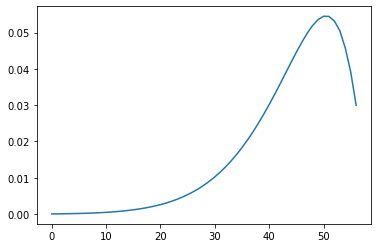

In [210]:
plt.plot(stationary_m2)

In [211]:
transition_mat_pe2 = np.array(P_e2_visual)

S, U = eig(transition_mat_pe2.T)
stationary_e2 = np.array(U[:, np.where(np.abs(S - 1.) < 1e-1)[0][0]].flat)
stationary_e2 = stationary_e2 / np.sum(stationary_e2)

stationary_e2

array([0.01389359+0.j, 0.01896067+0.j, 0.02339464+0.j, 0.02720062+0.j,
       0.03028904+0.j, 0.03275061+0.j, 0.03463992+0.j, 0.03600584+0.j,
       0.03691547+0.j, 0.03742187+0.j, 0.03757779+0.j, 0.03742951+0.j,
       0.03701938+0.j, 0.0363861 +0.j, 0.03556476+0.j, 0.03458713+0.j,
       0.03348183+0.j, 0.03227454+0.j, 0.03098822+0.j, 0.0296433 +0.j,
       0.0282579 +0.j, 0.02684795+0.j, 0.02542741+0.j, 0.02400842+0.j,
       0.02260147+0.j, 0.02121552+0.j, 0.01985815+0.j, 0.01853571+0.j,
       0.01725341+0.j, 0.01601545+0.j, 0.01482514+0.j, 0.01368496+0.j,
       0.01259669+0.j, 0.01156147+0.j, 0.01057989+0.j, 0.00965205+0.j,
       0.00877764+0.j, 0.00795597+0.j, 0.00718607+0.j, 0.00646671+0.j,
       0.00579642+0.j, 0.00517359+0.j, 0.00459646+0.j, 0.00406317+0.j,
       0.00357177+0.j, 0.00312026+0.j, 0.00270664+0.j, 0.00232887+0.j,
       0.00198488+0.j, 0.0016726 +0.j, 0.00139039+0.j, 0.00113602+0.j,
       0.00090753+0.j, 0.00070457+0.j, 0.00052294+0.j, 0.00036513+0.j,
      

In [212]:
sum(stationary_e2)

(1+0j)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


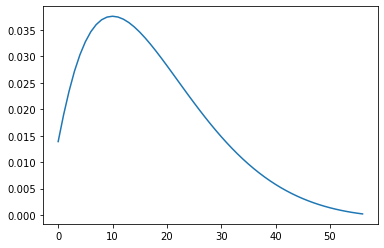

In [213]:
plt.plot(stationary_e2)

In [214]:
transition_mat_pm3 = np.array(P_m3_visual)

S, U = eig(transition_mat_pm3.T)
stationary_m3 = np.array(U[:, np.where(np.abs(S - 1.) < 1e-1)[0][0]].flat)
stationary_m3 = stationary_m3 / np.sum(stationary_m3)

stationary_m3

array([0.00023008+0.j, 0.00038531+0.j, 0.00056659+0.j, 0.00077905+0.j,
       0.00102158+0.j, 0.00129742+0.j, 0.00160949+0.j, 0.00196062+0.j,
       0.00235417+0.j, 0.0027936 +0.j, 0.00328207+0.j, 0.00382305+0.j,
       0.00442002+0.j, 0.00507641+0.j, 0.00579558+0.j, 0.00658083+0.j,
       0.00743526+0.j, 0.00836175+0.j, 0.0093629 +0.j, 0.01044088+0.j,
       0.01159738+0.j, 0.0128335 +0.j, 0.0141496 +0.j, 0.01554518+0.j,
       0.0170187 +0.j, 0.01856745+0.j, 0.02018731+0.j, 0.02187258+0.j,
       0.02361571+0.j, 0.02540711+0.j, 0.02723481+0.j, 0.02908418+0.j,
       0.03093764+0.j, 0.03277428+0.j, 0.03456949+0.j, 0.03629457+0.j,
       0.0379163 +0.j, 0.03939647+0.j, 0.04069147+0.j, 0.04175166+0.j,
       0.04252102+0.j, 0.04293601+0.j, 0.04292694+0.j, 0.04241511+0.j,
       0.041299  +0.j, 0.03951965+0.j, 0.03694036+0.j, 0.033468  +0.j,
       0.02884552+0.j, 0.0232933 +0.j, 0.01681304+0.j])

In [215]:
sum(stationary_m3)

(1+0j)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


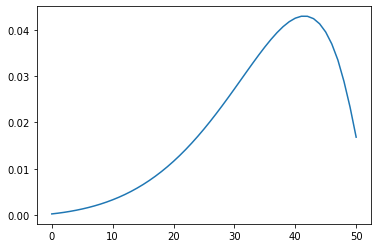

In [216]:
plt.plot(stationary_m3)

In [217]:
transition_mat_pe3 = np.array(P_e3_visual)

S, U = eig(transition_mat_pe3.T)
stationary_e3 = np.array(U[:, np.where(np.abs(S - 1.) < 1e-1)[0][0]].flat)
stationary_e3 = stationary_e3 / np.sum(stationary_e3)

stationary_e3

array([0.01092329-0.j, 0.01531899-0.j, 0.01923963-0.j, 0.02271557-0.j,
       0.02563258-0.j, 0.02811022-0.j, 0.03016507-0.j, 0.0318507 -0.j,
       0.03316373-0.j, 0.03414851-0.j, 0.03482407-0.j, 0.03522116-0.j,
       0.03536629-0.j, 0.0352843 -0.j, 0.03499917-0.j, 0.03453341-0.j,
       0.03390842-0.j, 0.03314427-0.j, 0.03225988-0.j, 0.0312729 -0.j,
       0.03019979-0.j, 0.02905586-0.j, 0.02785523-0.j, 0.02661094-0.j,
       0.02533495-0.j, 0.02403815-0.j, 0.02273048-0.j, 0.02142089-0.j,
       0.02011743-0.j, 0.01882729-0.j, 0.01755684-0.j, 0.01631168-0.j,
       0.01509668-0.j, 0.01391601-0.j, 0.01277325-0.j, 0.01167133-0.j,
       0.01061269-0.j, 0.0095992 -0.j, 0.00863233-0.j, 0.00771307-0.j,
       0.00684206-0.j, 0.00601945-0.j, 0.00524535-0.j, 0.00451921-0.j,
       0.00384044-0.j, 0.00320922-0.j, 0.00262379-0.j, 0.00208585-0.j,
       0.00159194-0.j, 0.00113981-0.j, 0.00072664-0.j])

In [218]:
sum(stationary_e3)

(1.0000000000000007+0j)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


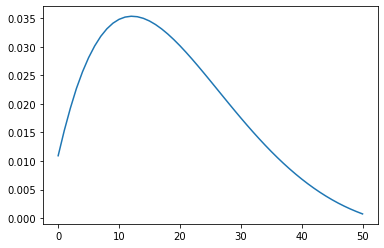

In [219]:
plt.plot(stationary_e3)